# Darpa score analysis


## Load data

In [12]:
import zipfile
import os

def extract_zip_files(folder_path):
  for filename in os.listdir(folder_path):
    if filename.endswith(".zip"):
      filepath = os.path.join(folder_path, filename)
      try:
        with zipfile.ZipFile(filepath, 'r') as zip_ref:
          zip_ref.extractall(folder_path)
        print(f"Extracted {filename} successfully.")
      except zipfile.BadZipFile:
        print(f"Error: {filename} is not a valid zip file.")
      except Exception as e:
        print(f"An error occurred while extracting {filename}: {e}")

# Example usage (replace with your folder path)
extract_zip_files(".")


Extracted anoedge_g_DARPA_score.zip successfully.


In [13]:
import pandas as pd

# Load the CSV file into a DataFrame without a header
df = pd.read_csv('./anoedge_g_DARPA_score.csv', header=None, sep=' ')

# Assign column names
df.columns = ['Prediction', 'Label']

In [14]:
df.head()

,Prediction,Label
0,1.0,0
1,2.0,0
2,1.0,0
3,2.0,0
4,1.0,0


In [15]:
print(f"{len(df):,}")

4,554,344


In [16]:
# prompt: I want to view distribution of Label values in a helpful table

# Display the distribution of Label values
label_counts = df['Label'].value_counts()
label_counts

,count
Label,
1,2737209
0,1817135


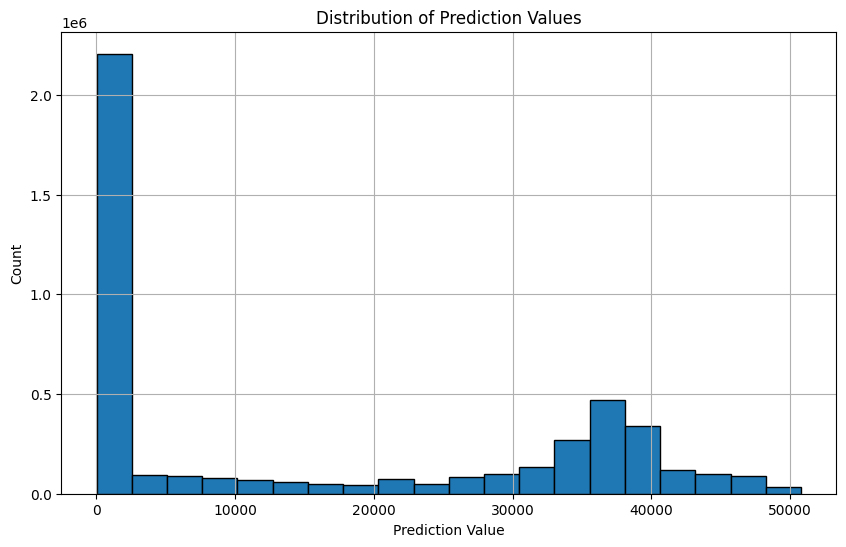

In [17]:
# prompt:  I want to see distribution of values in Prediction column in my dataframe called df
# I want to visualize it not in table in a good chart
# Give me a histogram of distrbiution of values and count

import matplotlib.pyplot as plt
# ... (your existing code)

# Display the distribution of Prediction values using a histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(df['Prediction'], bins=20, edgecolor='black')  # Adjust the number of bins
plt.xlabel('Prediction Value')
plt.ylabel('Count')
plt.title('Distribution of Prediction Values')
plt.grid(True)
plt.show()

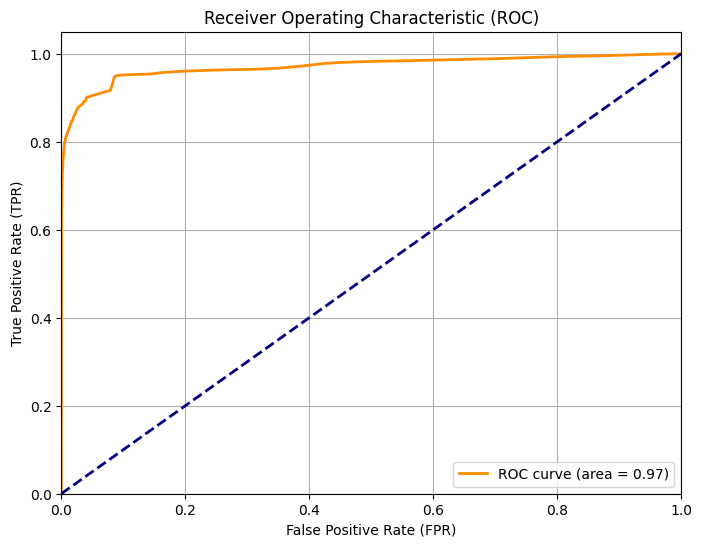

In [19]:
# prompt: This data frame has two column
# The first column is predicted expectation of a classification algorithm
# The second column is zero or one please draw TPR over FPR curve

import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (your existing code)

# Calculate TPR and FPR
fpr, tpr, thresholds = roc_curve(df['Label'], df['Prediction'])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()